In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
import pandas as pd
import numpy as np

In [3]:
# For ploting the graphs
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Machine learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


In [6]:
# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc,confusion_matrix


In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [8]:
import os
os.chdir('C:\\Users\\Karthii\\OneDrive - Vel Tech\\Desktop\\Major_dind_4')
df= pd.read_csv("ddos_dataset.csv")

In [9]:
print(df.head(5))

    Destination Port   Flow Duration   Total Fwd Packets  \
0                 53             159                   2   
1                 53           51673                   2   
2               7496              43                   1   
3              46564              61                   1   
4                 80              69                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        2                           68   
1                        2                           90   
2                        1                            0   
3                        1                            6   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                           266                      34   
1                           166                      45   
2                             6                       0   
3                             6                 

In [10]:
print("shape of dataset : " ,df.shape)

shape of dataset :  (25191, 79)


In [11]:
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,159,2,2,68,266,34,34,34.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,53,51673,2,2,90,166,45,45,45.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,7496,43,1,1,0,6,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,ATTACK
3,46564,61,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,80,69,2,0,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,80,98403702,7,5,377,11595,377,0,53.857143,142.492606,...,32,986.0,0.0,986,986,98400000.0,0.0,98400000,98400000,ATTACK
6,53,30843,1,1,54,70,54,54,54.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,5421062,4,4,404,557,392,0,101.000000,194.020617,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,53,206,2,2,102,134,51,51,51.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,443,150960,23,29,871,42347,389,0,37.869565,97.234629,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             25191 non-null  int64  
 1    Flow Duration                25191 non-null  int64  
 2    Total Fwd Packets            25191 non-null  int64  
 3    Total Backward Packets       25191 non-null  int64  
 4   Total Length of Fwd Packets   25191 non-null  int64  
 5    Total Length of Bwd Packets  25191 non-null  int64  
 6    Fwd Packet Length Max        25191 non-null  int64  
 7    Fwd Packet Length Min        25191 non-null  int64  
 8    Fwd Packet Length Mean       25191 non-null  float64
 9    Fwd Packet Length Std        25191 non-null  float64
 10  Bwd Packet Length Max         25191 non-null  int64  
 11   Bwd Packet Length Min        25191 non-null  int64  
 12   Bwd Packet Length Mean       25191 non-null  float64
 13   

In [13]:
df.describe()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,25191.000000,2.519100e+04,25191.000000,25191.00000,2.519100e+04,2.519100e+04,25191.000000,25191.000000,25191.000000,25191.000000,...,25191.000000,25191.000000,2.519100e+04,2.519100e+04,2.519100e+04,2.519100e+04,2.519100e+04,2.519100e+04,2.519100e+04,2.519100e+04
mean,8765.751379,1.302190e+07,14.372752,16.80628,5.837956e+02,2.992545e+04,219.933746,20.452860,62.091345,72.396546,...,10.750308,25.890358,8.175780e+04,4.553670e+04,1.631345e+05,5.662674e+04,6.095297e+06,3.628463e+05,6.366900e+06,5.795319e+06
std,19077.629319,3.191602e+07,1220.476270,1620.27646,7.757115e+03,3.632427e+06,739.251288,60.512982,191.647090,293.360718,...,1179.682409,6.436242,8.378623e+05,4.001228e+05,1.208254e+06,7.917691e+05,1.949681e+07,3.767660e+06,2.013473e+07,1.923531e+07
min,0.000000,-1.000000e+00,1.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.670000e+02,2.000000,1.00000,1.200000e+01,6.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.132600e+04,2.000000,2.00000,6.400000e+01,1.280000e+02,38.000000,6.000000,36.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,1.461366e+06,4.000000,4.00000,1.760000e+02,3.860000e+02,74.000000,38.000000,51.000000,23.276598,...,2.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65464.000000,1.199998e+08,193200.000000,256740.00000,1.162781e+06,5.756816e+08,11632.000000,1983.000000,2901.750000,5795.500690,...,187113.000000,60.000000,1.016597e+08,2.529324e+07,1.016597e+08,1.016597e+08,1.200000e+08,6.270000e+07,1.200000e+08,1.200000e+08


In [22]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

In [23]:
initial_eda(df)


Dimensions : 25191 rows, 79 columns
Total NA Values : 6 
                           Column Name  Data Type      #Distinct  NA Values
                      Destination Port      int64         4713          0
                         Flow Duration      int64        15229          0
                     Total Fwd Packets      int64          169          0
                Total Backward Packets      int64          200          0
           Total Length of Fwd Packets      int64         2361          0
           Total Length of Bwd Packets      int64         3517          0
                 Fwd Packet Length Max      int64         1333          0
                 Fwd Packet Length Min      int64          123          0
                Fwd Packet Length Mean    float64         3959          0
                 Fwd Packet Length Std    float64         5037          0
                 Bwd Packet Length Max      int64         1352          0
                 Bwd Packet Length Min      int64    

In [24]:
df["Label"].value_counts()

Label
BENIGN    22744
ATTACK     2447
Name: count, dtype: int64

In [25]:
df["Label"].unique()

array(['BENIGN', 'ATTACK'], dtype=object)

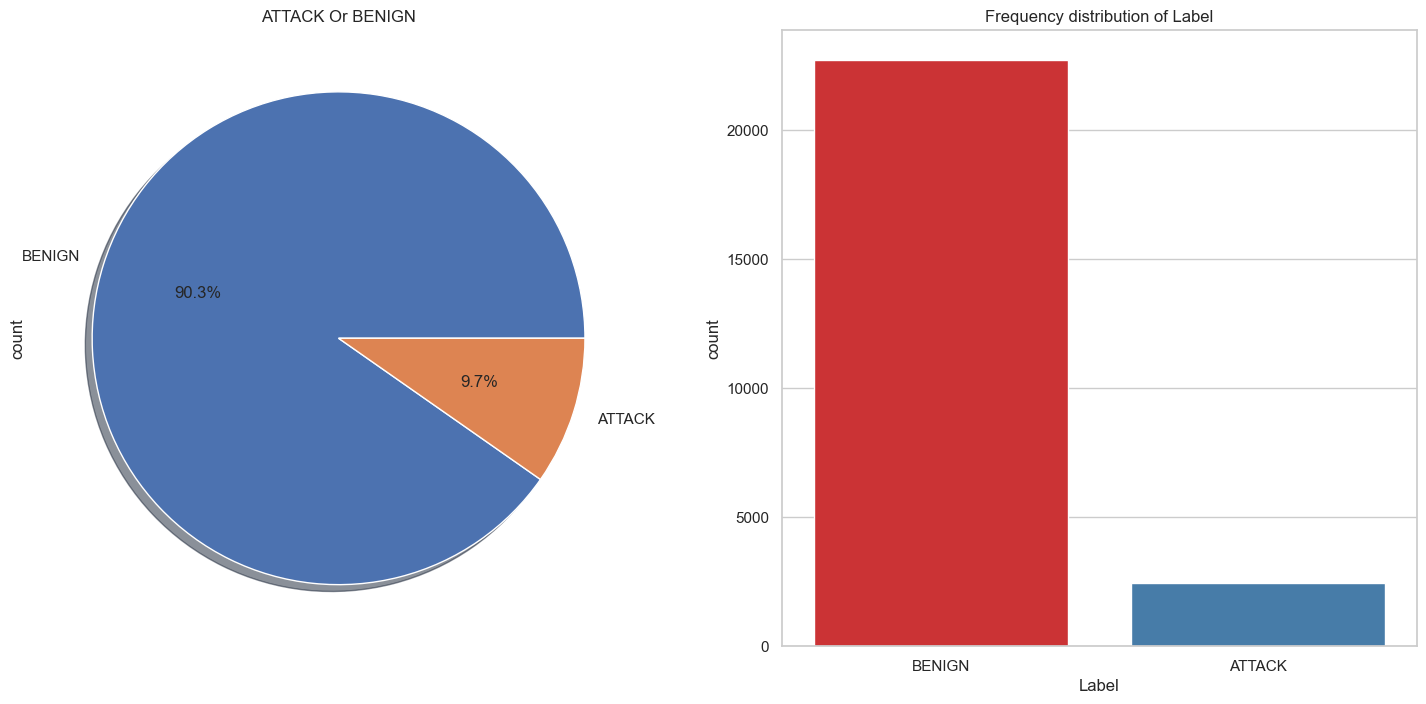

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0] = df['Label'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('ATTACK Or BENIGN')
#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Label", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of Label")
plt.show()

In [27]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,159,2,2,68,266,34,34,34.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,53,51673,2,2,90,166,45,45,45.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,7496,43,1,1,0,6,0,0,0.0,0.0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,ATTACK
3,46564,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,80,69,2,0,0,0,0,0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


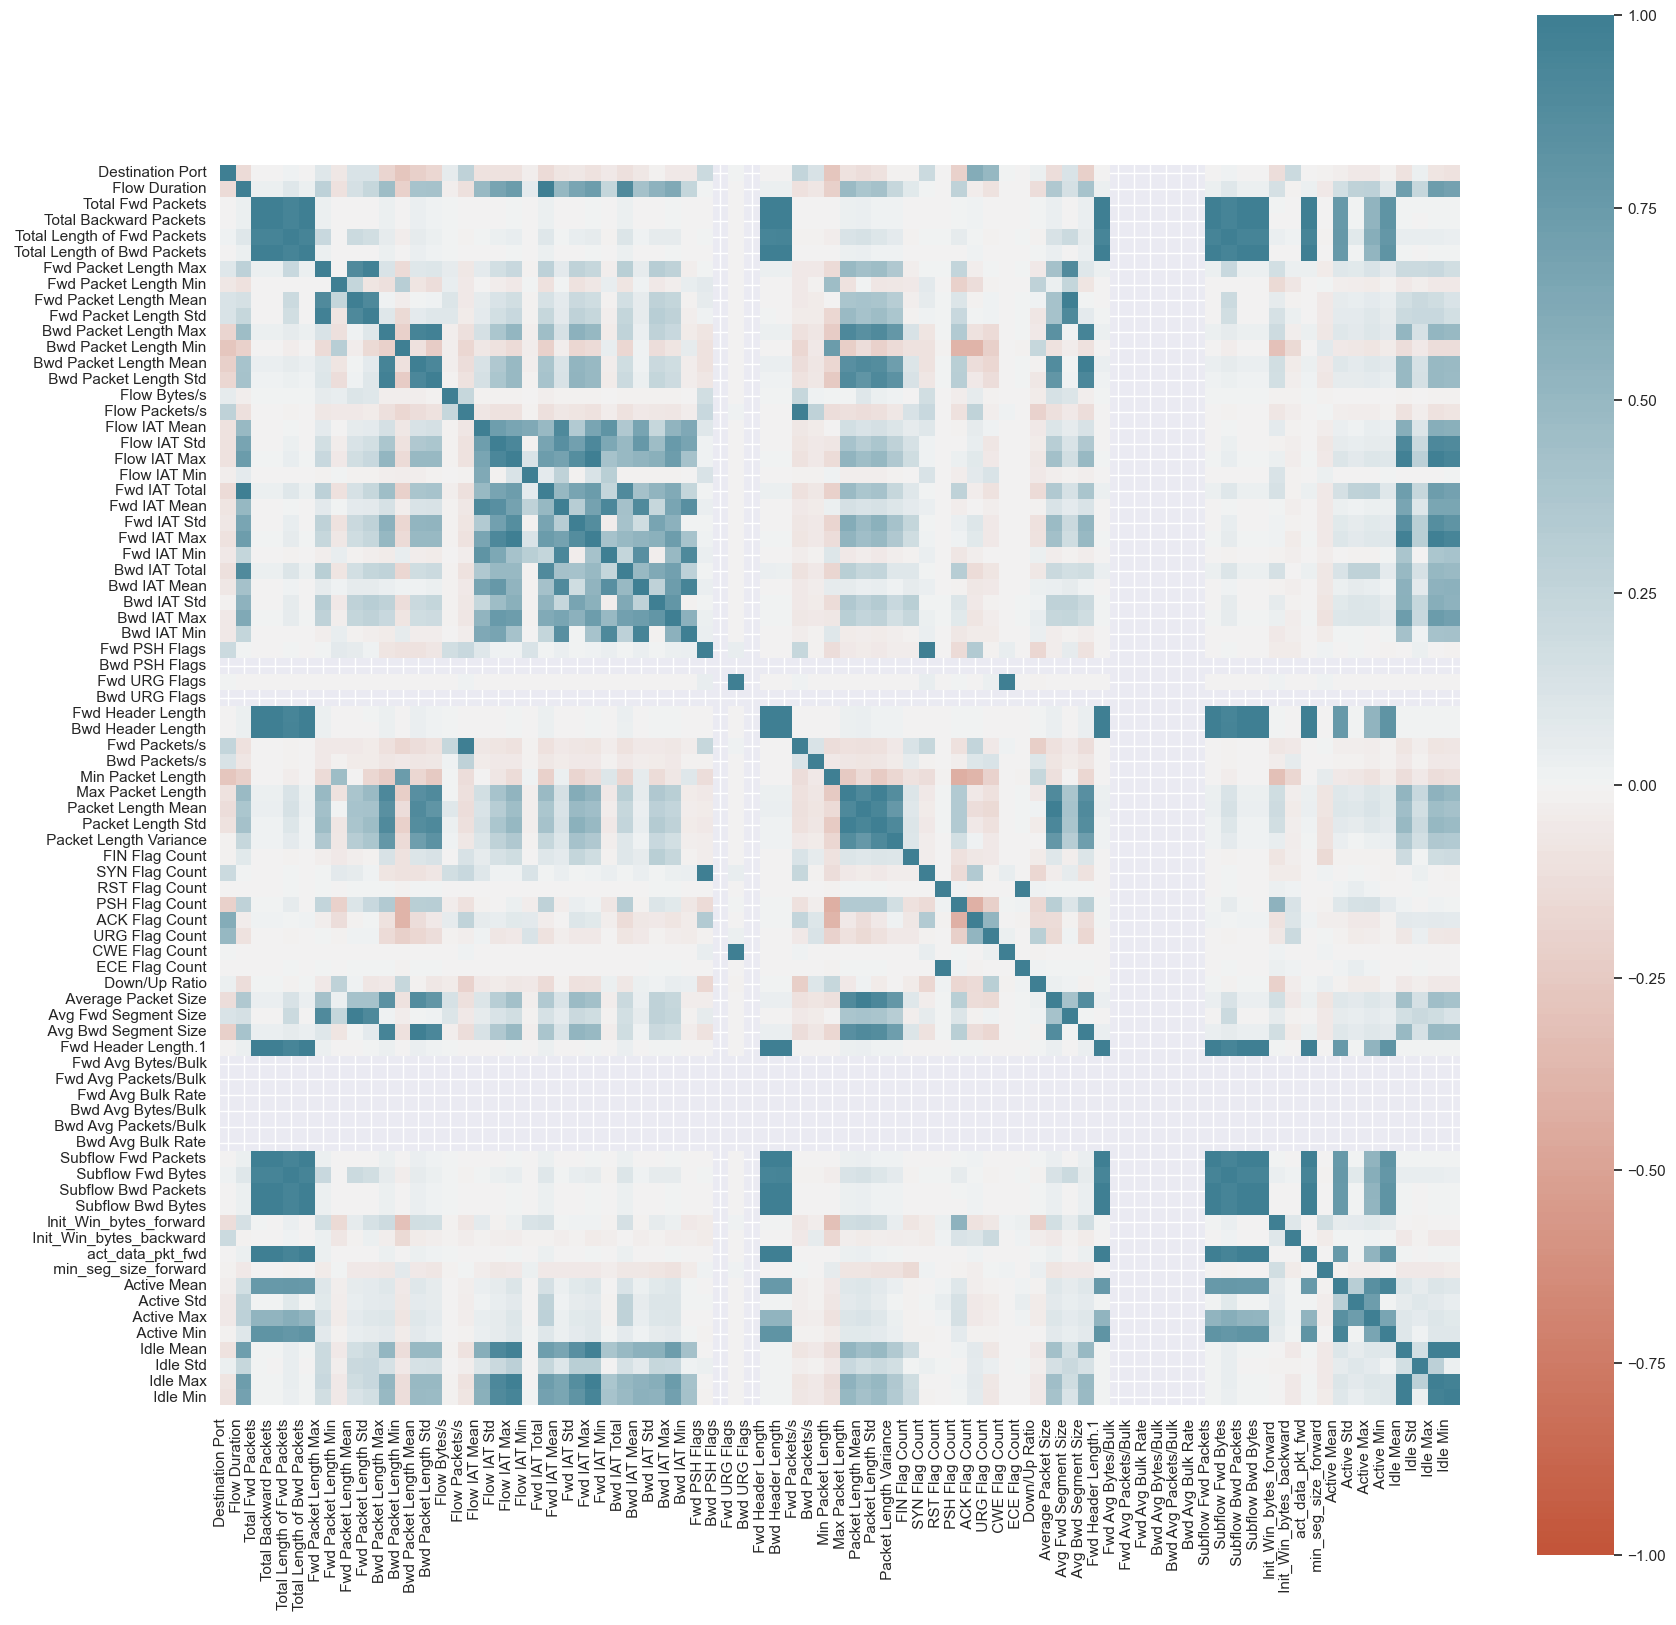

In [32]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlations
corr = numeric_df.corr()

# Set up the heatmap
sns.set(rc={'figure.figsize': (20, 20)})
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Rotate the x-axis labels for better visibility
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

# Show the plot
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()
df["Label"] = encoder.fit_transform(df["Label"])

In [35]:
df["Label"].unique()

array([1, 0])

In [36]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace= True)


In [37]:
X = df.drop(['Label'], axis=1)
y = df['Label']

In [38]:
from sklearn.model_selection import train_test_split
#Creating training and testing data from unbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [39]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [40]:
feature_scores = pd.Series(clf.feature_importances_,
index=X_train.columns).sort_values(ascending=False)
feature_scores


 Bwd Packet Length Mean    0.065113
 Packet Length Variance    0.059626
 Packet Length Std         0.058921
 Bwd Packet Length Std     0.057819
 Avg Bwd Segment Size      0.057075
                             ...   
 Fwd Avg Packets/Bulk      0.000000
 Bwd PSH Flags             0.000000
Bwd Avg Bulk Rate          0.000000
 Bwd Avg Packets/Bulk      0.000000
 Fwd Avg Bulk Rate         0.000000
Length: 78, dtype: float64

Text(0, 0.5, 'FEATURE NAMES')

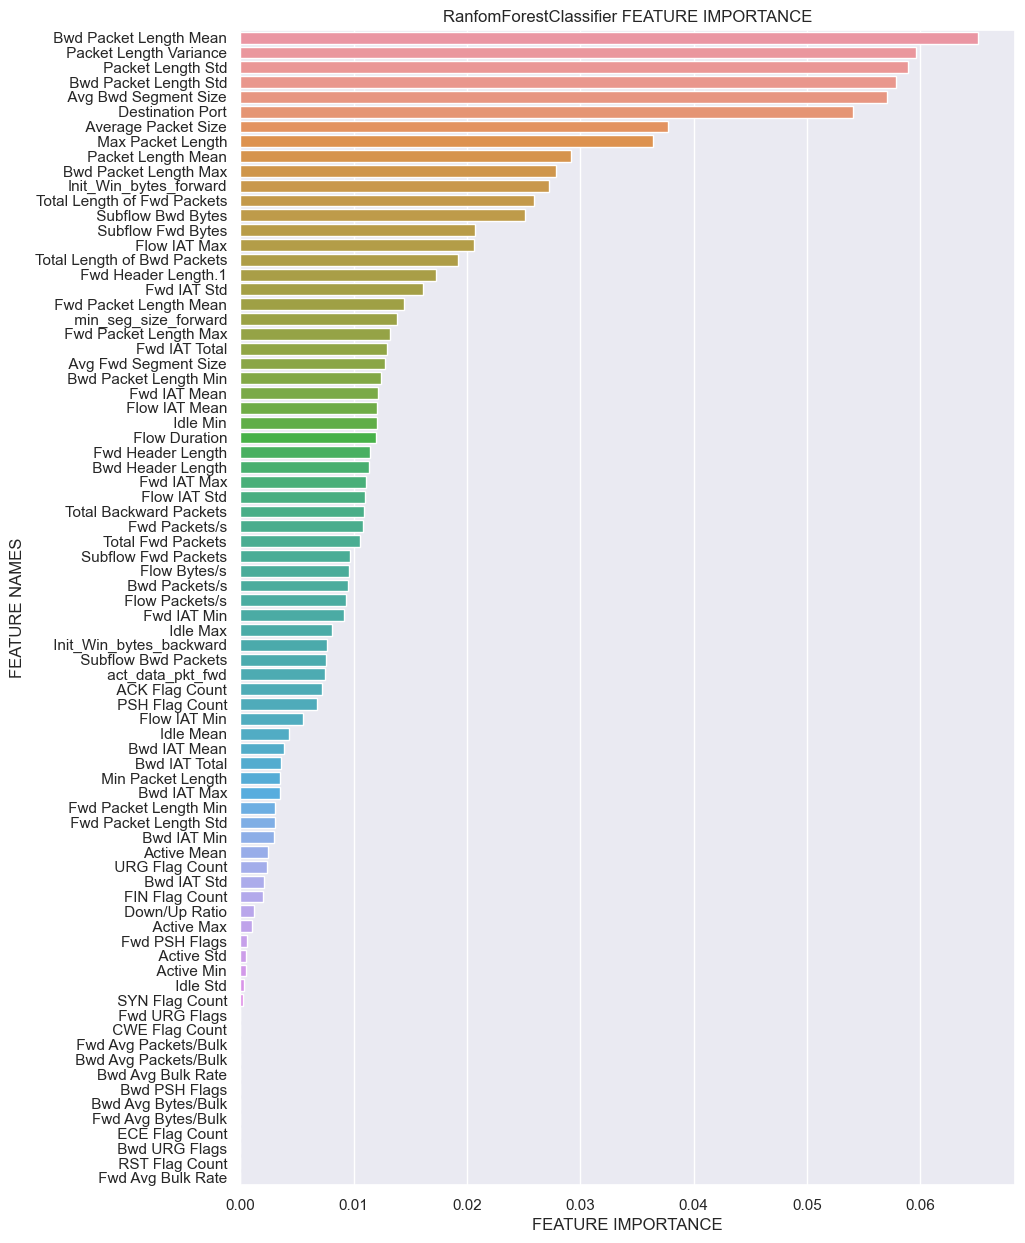

In [41]:
# Creating a seaborn bar plot

#Create a DataFrame using a Dictionary
data={'feature_names':feature_scores.index,'feature_importance':feature_scores}
feature_importance = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
feature_importance.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,15))
#Plot Searborn bar chart
sns.barplot(x=feature_importance['feature_importance'], y=feature_importance['feature_names'])
#Add chart labels
plt.title('RanfomForestClassifier FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [42]:
features = feature_scores[feature_scores >= 0.035].index

In [43]:
df_filtered = X[features]

In [44]:
df_filtered.shape

(25179, 8)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_filtered, y, test_size = 0.3, random_state = 0)

In [46]:
# instantiate the classifier with n_estimators = 100
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with selected features : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_pred,y_test))

Model accuracy score with selected features : 0.9864
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       609
           1       1.00      0.99      0.99      6945

    accuracy                           0.99      7554
   macro avg       0.93      0.99      0.96      7554
weighted avg       0.99      0.99      0.99      7554



In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc,confusion_matrix
#29 line
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [49]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)


In [50]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9416
F1 Score: 0.9687
Precision: 0.9416
Recall: 0.9975


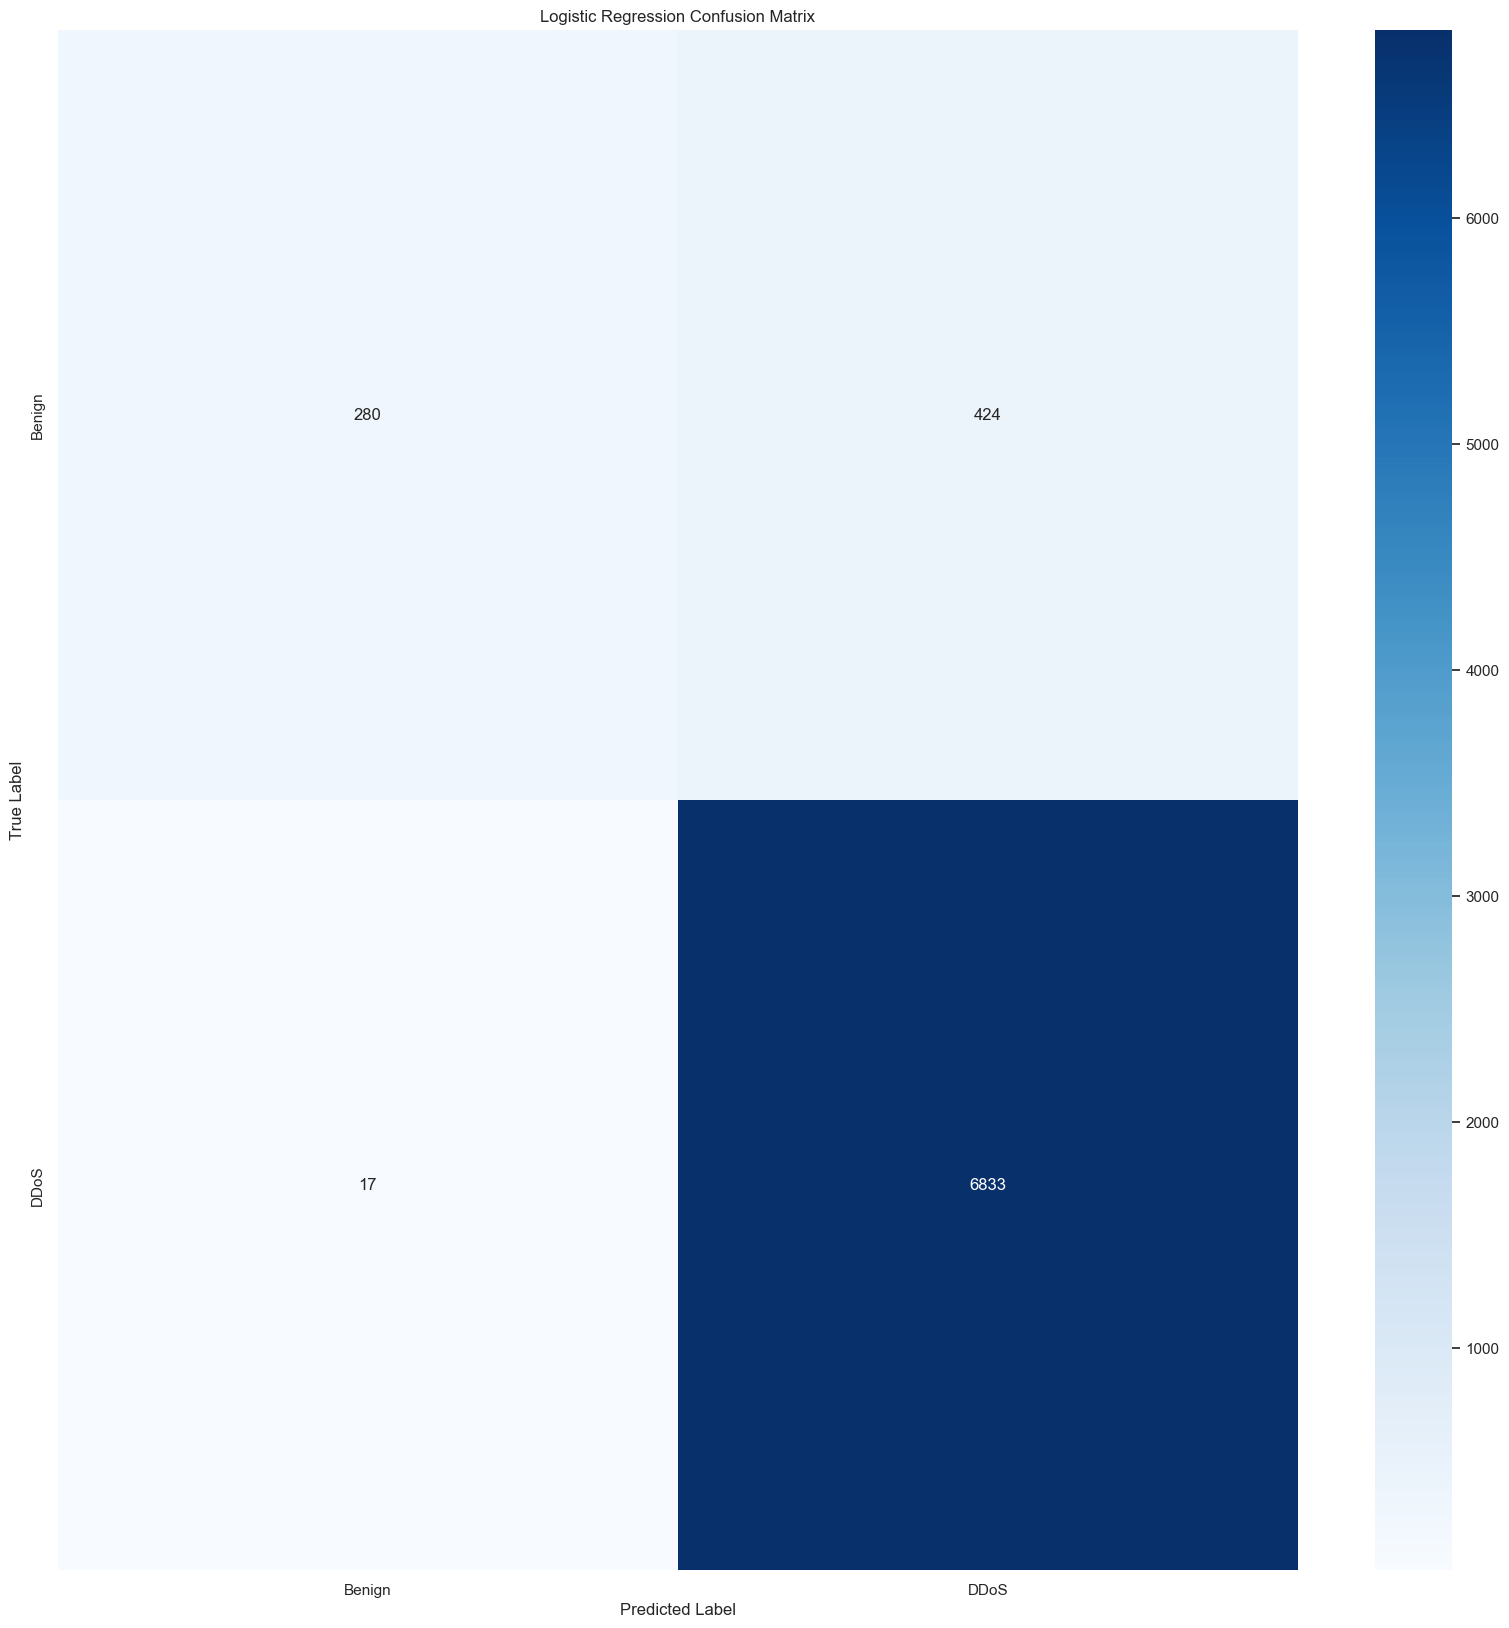

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and lr_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, lr_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'DDoS'], yticklabels=['Benign', 'DDoS'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [52]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)


In [53]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

In [54]:
print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9061
F1 Score: 0.9487
Precision: 0.9407
Recall: 0.9568


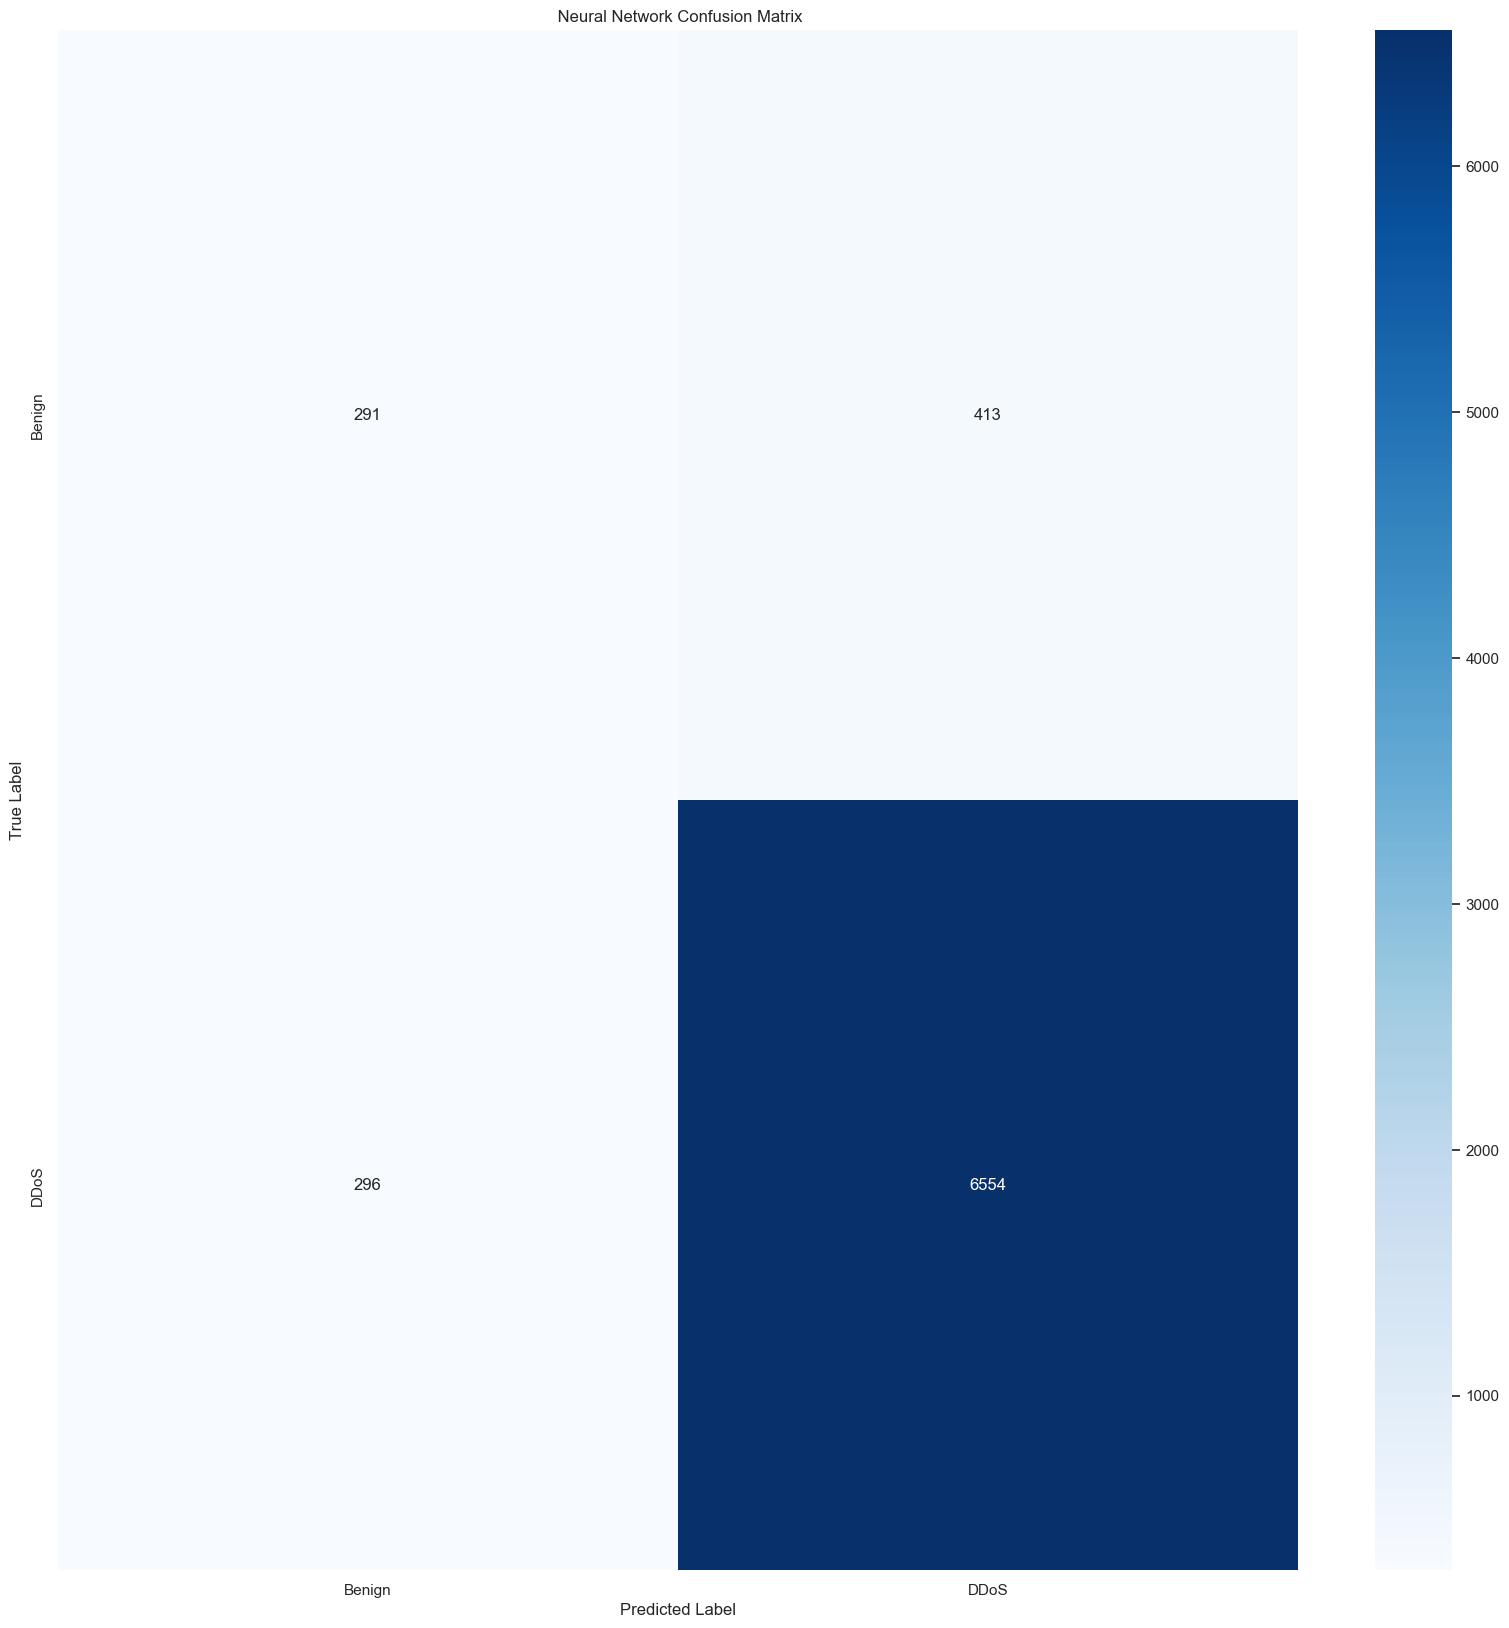

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and lr_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, nn_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'DDoS'], yticklabels=['Benign', 'DDoS'])
plt.title(' Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
# Random Forest
y_pred = clf.predict(X_test)
# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)
# Neural Network
nn_proba = nn_model.predict_proba(X_test)

In [57]:
# Flatten the y_test array if it's a 2D array
y_test_flat = y_test.ravel()

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test_flat, y_pred)
lr_auc = auc(lr_fpr, lr_tpr)

# Assuming lr_proba is a 2D array with shape (7554, 2)
positive_class_proba = lr_proba[:, 1]

# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test_flat, positive_class_proba)
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test_flat, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

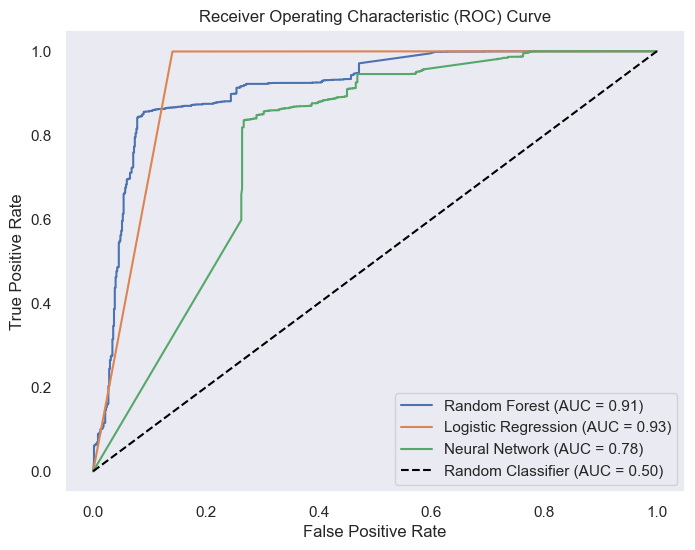

In [58]:
#Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()